In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

import calendar

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
df=pd.read_csv('/Users/manasvinisridharr/Documents/Medhu/Advanced REgression/Assignment/train.csv')

## Data Exploration:

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
len(df.isnull().sum()[df.isnull().sum()!=0])

19

<ul>
    <li>The <b>dependent variable</b> is <b>SalePrice</b>.</li>
    <li>There are 1460 rows and 81 columns in the dataset.</li>
    <li>There are 19 columns that contain NULLs.</li>
    <li>By looking at the mean and median for each numerical variable, we can see that there are outliers in the data.</li>
    <li>Variable Type:
    <ul>
        <li>Continuous: The continuous variables are defined below in the list variable 'num'.</li>
        <li>Categorical: There are two types of categorical variables - numerical, defined in 'num_cat', and string type, defined in 'cat'.</li>
    </ul>
</ul>

<i>Note: Although, the year variables ('YearBuilt', 'YearRemodAdd','GarageYrBlt', 'YrSold') are numerical categorical type, they are defined separately in 'yr' for the purpose of the code.</i>

In [7]:
num = ['Id','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 
'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea','GarageArea','WoodDeckSF',
'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal','SalePrice']

cat = ['MSZoning','Street','Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig',
'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle',
'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond','Foundation',
'BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu', 'GarageType',
'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence', 'MiscFeature',
'SaleType','SaleCondition']

num_cat = ['MSSubClass', 'OverallQual', 'OverallCond', 
'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars','MoSold']

yr = ['YearBuilt', 'YearRemodAdd','GarageYrBlt', 'YrSold']

<b>Note</b>: These lists are constantly updated throughout the code, i.e., features are added (new derived features) or removed (dropping features) from the lists.

In [8]:
#Making sure all variables have been included:
assert len(num)+len(num_cat)+len(cat)+len(yr)==df.shape[1]

#### Checking NaN Values

In [9]:
#Getting columns that contain NULLs:
df.isnull().sum()[df.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

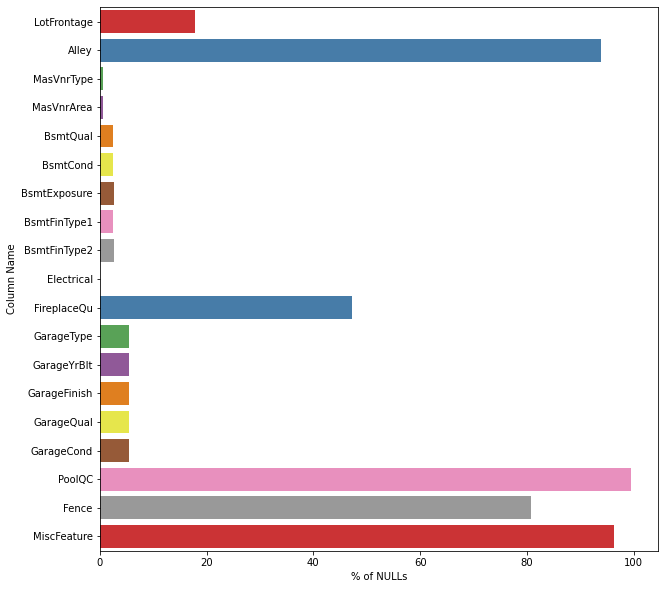

In [10]:
#Visualisation of NULLs percentage for columns that contain NULLs:

nulls=pd.DataFrame(df.isnull().sum()[df.isnull().sum()!=0]).reset_index()
nulls.columns=['Column Name','% of NULLs']
nulls['% of NULLs']=round((nulls['% of NULLs']/len(df)),4)*100
plt.figure(figsize=(10,10))
sns.barplot(x='% of NULLs',y='Column Name',palette='Set1',data=nulls)
plt.show()

## Data Cleaning

### Handling NaN values

- Based on data dictionary and observing the data, it can be inferred that the columns mentioned in the cell below have NA as a category which is interpreted as NaN when we read the data. Thus, we can replace NaN in these columns in the following manner:

In [11]:
df['Alley'] = df['Alley'].fillna('No alley access')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['Fence'] = df['Fence'].fillna('No Fence')
df['MiscFeature'] = df['MiscFeature'].fillna('No features')

#Filling in missing values in Basement related categorical variables with 'No Basement'
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']]=df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']].fillna('No Basement')

#Filling in missing values in Garage related categorical variables (except GarageYrBlt) with 'No Garage'
df[['GarageType', 'GarageFinish', 'GarageQual','GarageCond']]=df[['GarageType', 'GarageFinish', 'GarageQual','GarageCond']].apply(lambda x: x.fillna('No Garage'))

In [12]:
#Checking remaining columns containing missing values
df.isnull().sum()[df.isnull().sum()!=0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [13]:
#Imputing missing value in categorical variable with mode:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

#Imputing missing value in continuous variable with median (median is preferred due to presence of outliers):
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].describe()['50%']) 

- Imputing with median value for continuous variables:

In [14]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].describe()['50%'])

- Imputing missing values in categorical variable with mode

In [15]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

- GarageYrBlt: Business decision - Since we have information we need about garage quality and condition, the year that the garage was built does not contribute anything useful and is therefore being dropped.

In [16]:
df=df.drop('GarageYrBlt',axis=1)
yr.remove('GarageYrBlt')

In [17]:
#Making sure all missing values have been dealt with
assert len(df.isnull().sum()[df.isnull().sum()!=0])==0, df.isnull().sum()[df.isnull().sum()!=0]

In [18]:
#Dropping ID variable
df=df.drop('Id',axis=1)
num.remove('Id')

### Exploring response variable

In [19]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

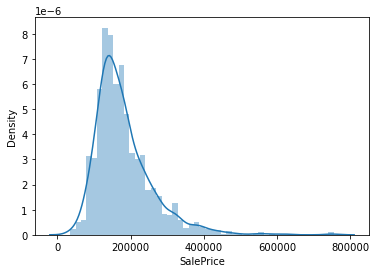

In [20]:
sns.distplot(df['SalePrice'])
plt.show()

In [21]:
#To normalise the response variable, it is being transformed to log(SalePrice)
df['SalePrice']=df['SalePrice'].apply(lambda x:np.log(x))

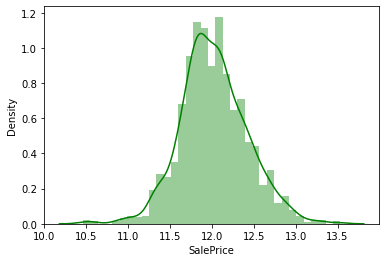

In [22]:
sns.distplot(df['SalePrice'], color='g')
plt.show()

<b>Year Variables</b> <br>
A sanity check has been done on the year variables: YearRemodAdd cannot be before the YearBuilt or after YrSold. If they are, then these rows are dropped.

In [23]:
if (df['YearBuilt']<=df['YearRemodAdd']).sum()!=len(df):
    df = df[df['YearBuilt']<=df['YearRemodAdd']].reset_index(drop=True)

if (df['YearBuilt']<=df['YrSold']).sum()!=len(df):
    df = df[df['YearBuilt']<=df['YrSold']].reset_index(drop=True)

if (df['YearRemodAdd']<=df['YrSold']).sum()!=len(df):
    df = df[df['YearRemodAdd']<=df['YrSold']].reset_index(drop=True)

In [24]:
#Checking percentage of rows retained
print('Percentage of rows retained: '+str(round((df.shape[0]/1460)*100,2))+'%')

Percentage of rows retained: 99.93%


- YearRemodAdd lets us know information regarrding how new the house is and thus the YearBuilt variable is not required. It is dropped to avoid redudancy.
- The age of the house at the time of selling can be given by taking the difference between YrSold and YearRemodAdd. In this way, a new feature is derived and YrSold and YearRemodAdd can be dropped.

In [25]:
df['Age']=df['YrSold']-df['YearRemodAdd']
df=df.drop(yr,axis=1)
num.append('Age')

In [26]:
#Variable is no longer required
del yr

### Univariate Analysis

#### Continuous Variables

- The uni_cont function has been defined to plot boxplots for each numerical variable in the list which is given as input.

In [27]:
def uni_cont(cont_cols,df=df):
    plt.figure(figsize=(25,35))
    for i in range(0,len(cont_cols)):
        plt.subplot(11,2,i+1)
        sns.boxplot(df[cont_cols[i]])
plt.show()

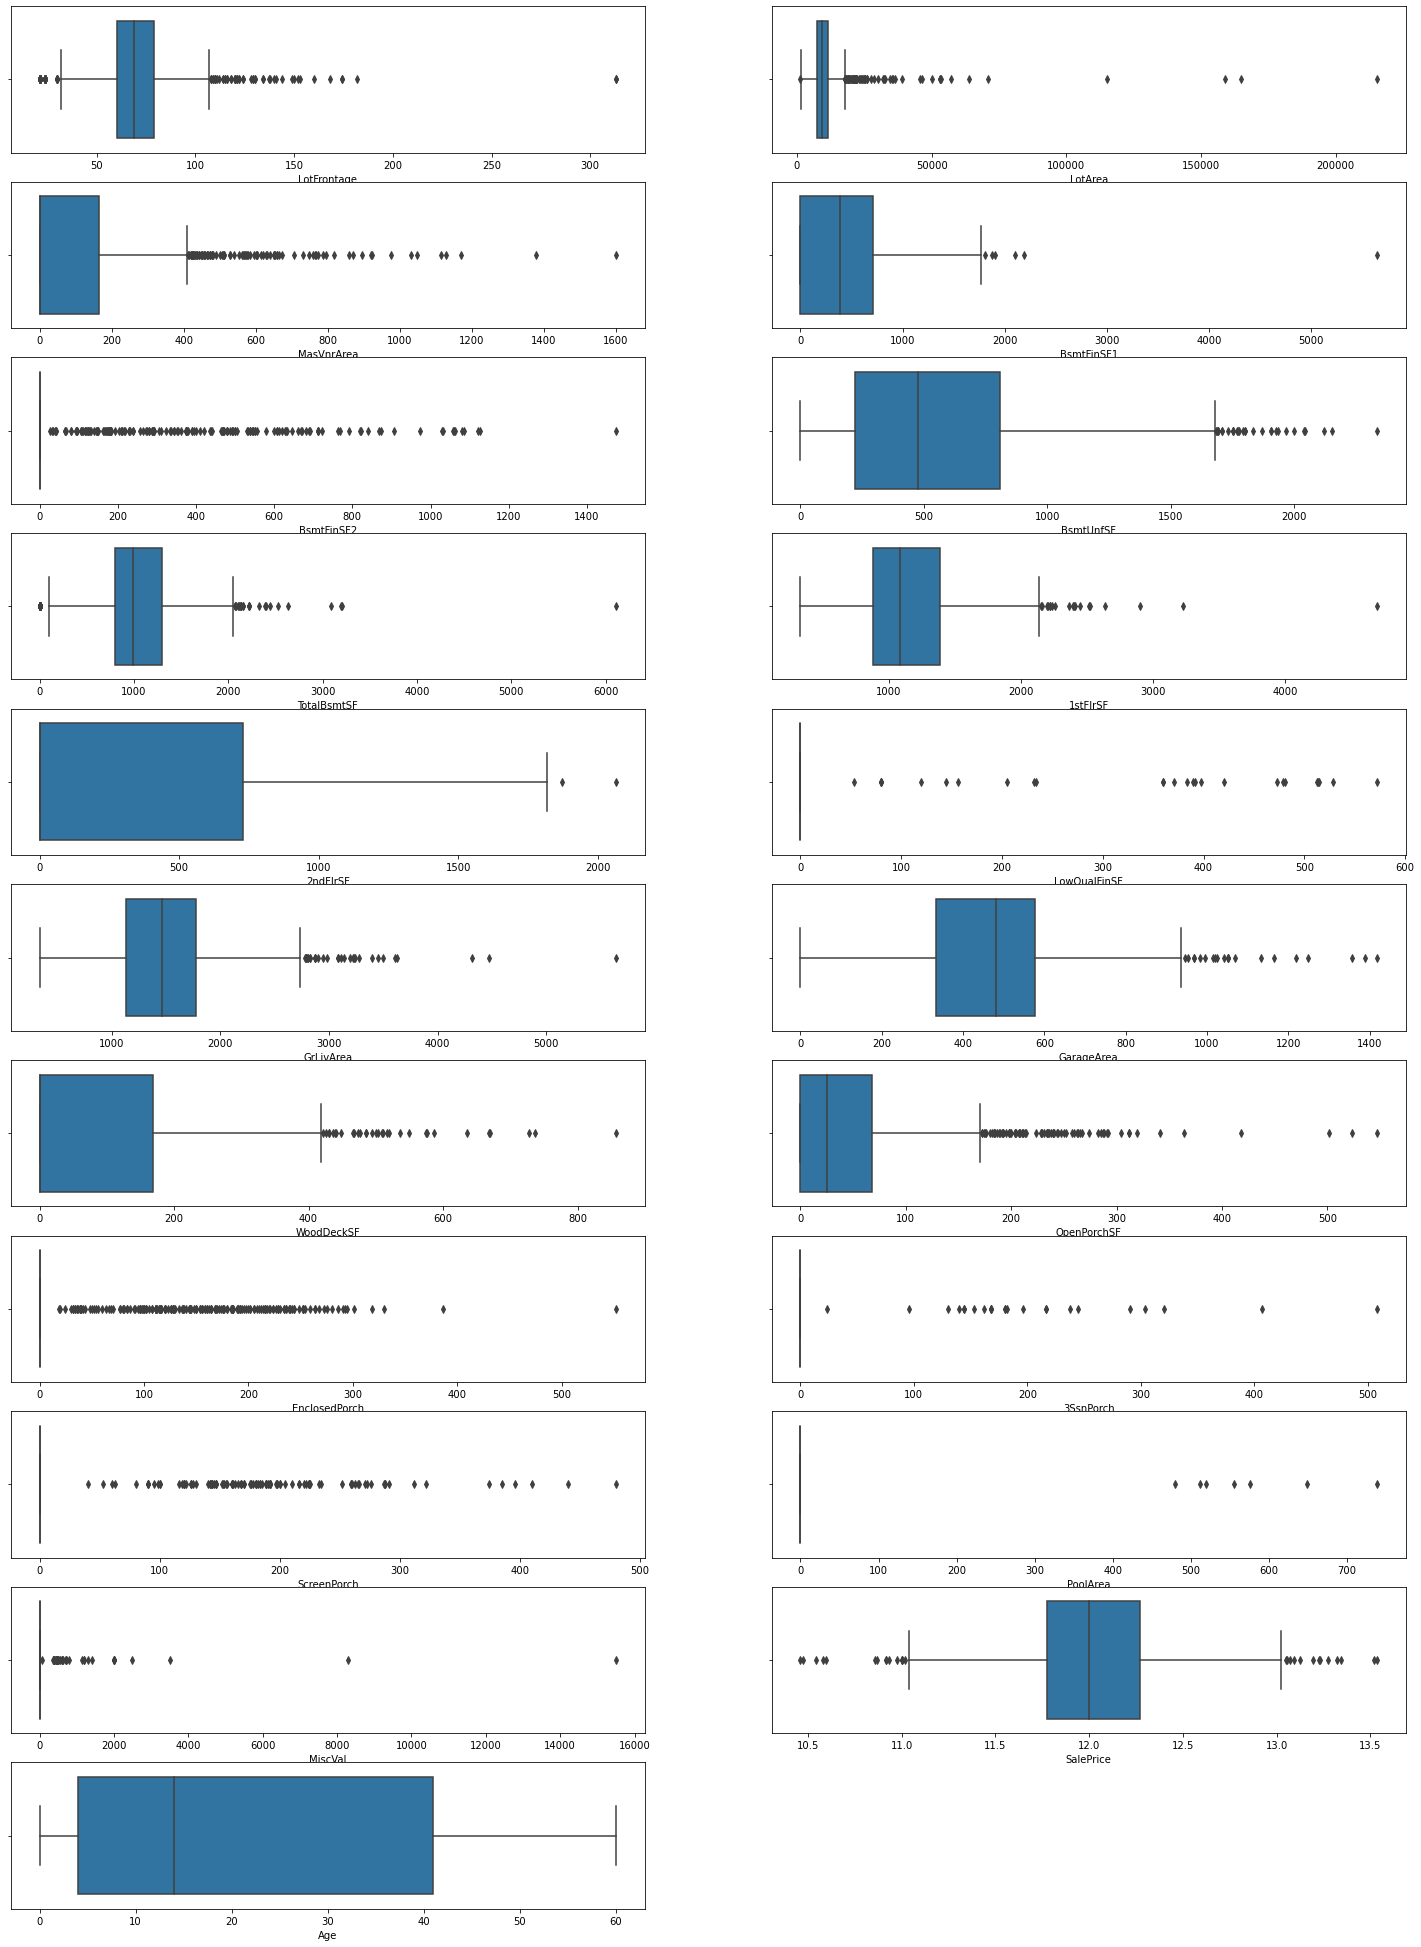

In [28]:
uni_cont(num)

- The boxplots show that there are outliers in the data. These will be dealt with later.
- There are many features for which most of the values are 0. This is due to absence of this facility (porch, basement, pool, etc.) in the house being sold. These features can be removed as they will not contribute to the prediction of SalePrice due to lack of variability.

In [29]:
r=[i for i in num if df[i].quantile(0.95)==0]
df=df.drop(r,axis=1)
[num.remove(i) for i in r]

[None, None, None, None]

In [30]:
print(r)

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


- As seen from the boxplot and the descriptive stats table, the features LowQualFinSF, 3SsnPorch, MiscVal and PoolArea, more than 95% values are 0. Therefore these two variables can be dropped as they do not give much information. 

#### Categorical Variables

- The bar_plots function has been defined to show the frequency of categories for each categorical variable given in the list (input list of categorical variables).

In [31]:
def bar_plots(cat_cols,df=df):
    plt.figure(figsize=(20,30))
    for i in range(0,len(cat_cols)):
        plt.subplot(7,2,i+1)  #based on len(cat+num_cat)=56 and no. of sets that they are being split into
        plt.title(cat_cols[i])
        df[cat_cols[i]].value_counts().plot.bar()
plt.show()

- The categorical variables have been split into four distinct sets with 14 features each and the function has been applied separately on each set for interpretability of the plots. 
- Features with imbalanced categories can be removed as they do not contribute to the prediction of the target variable due to lack of information.

<b>Note: </b>Imbalanced feature - One category having more than 80% of the data.

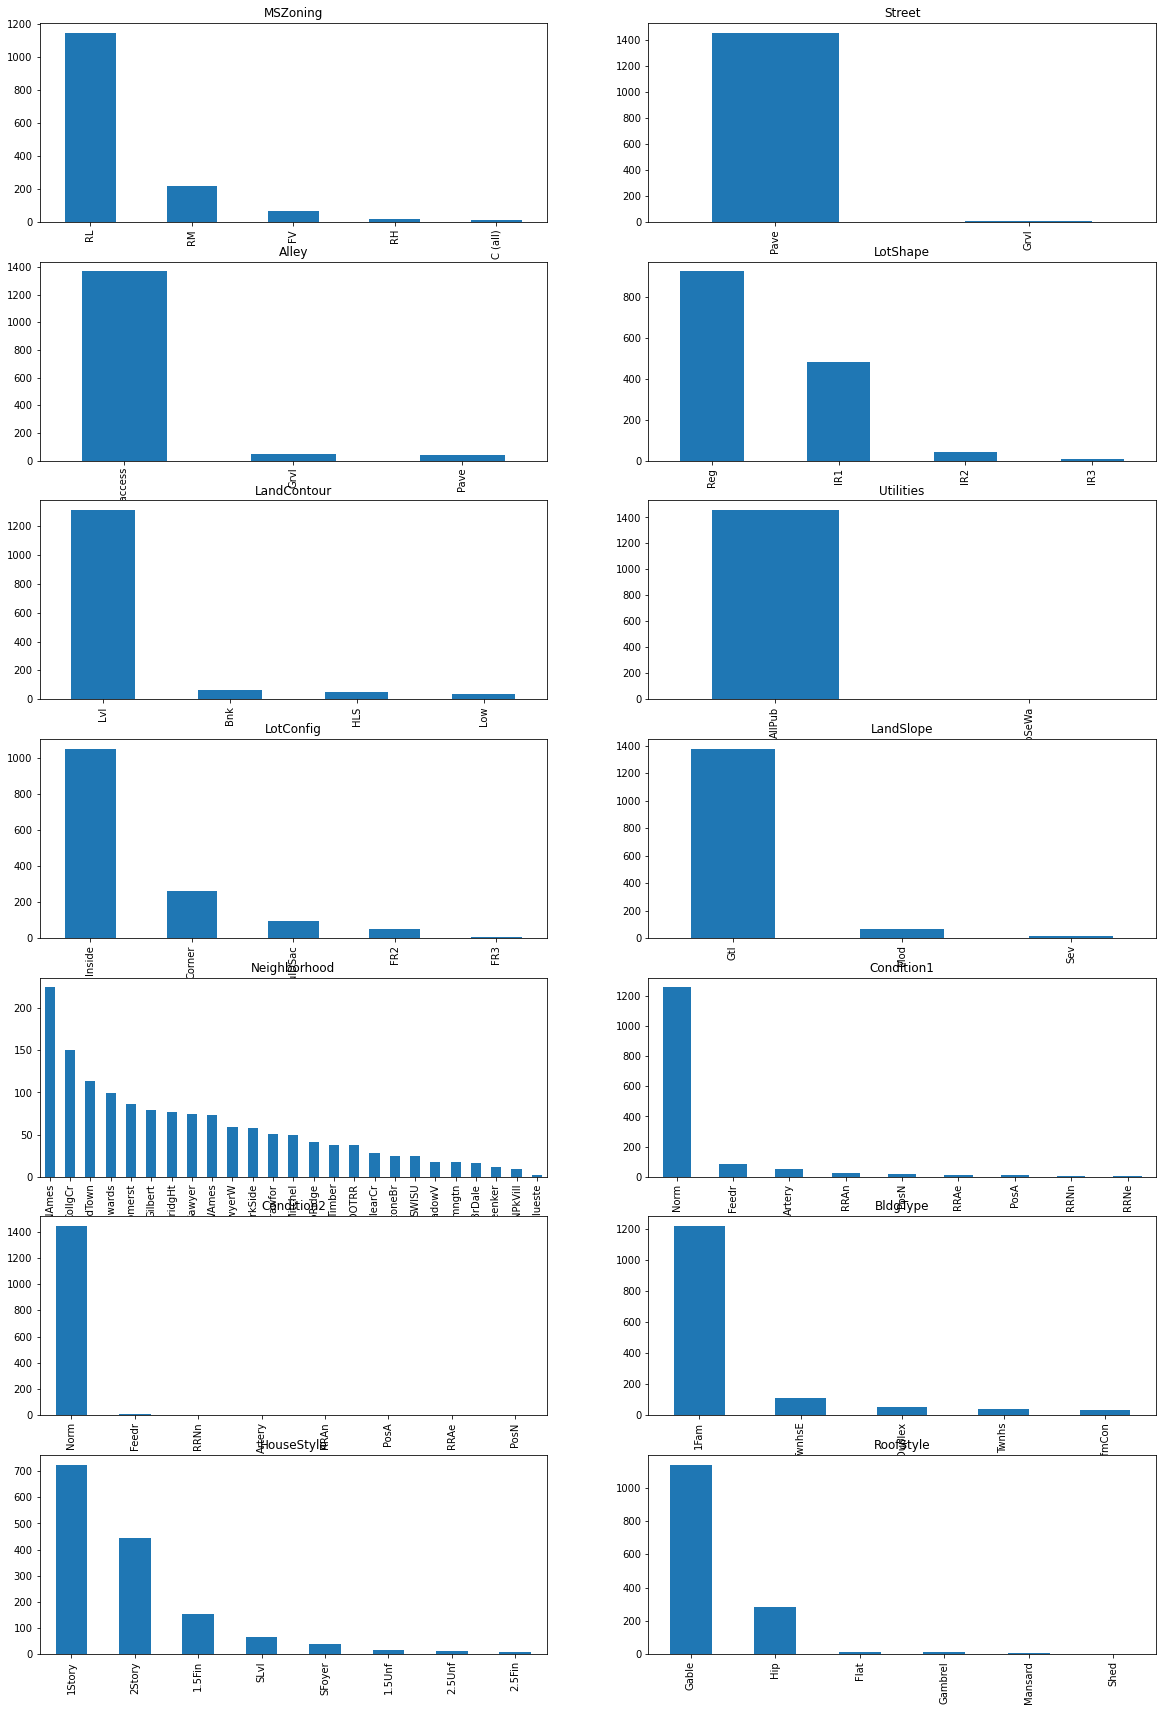

In [32]:
bar_plots((cat+num_cat)[:14])

As seen from the plots, the following features seem to have imbalanced categories:
1. Street
2. Alley
3. Utilities
4. Condition2
5. RoofStyle

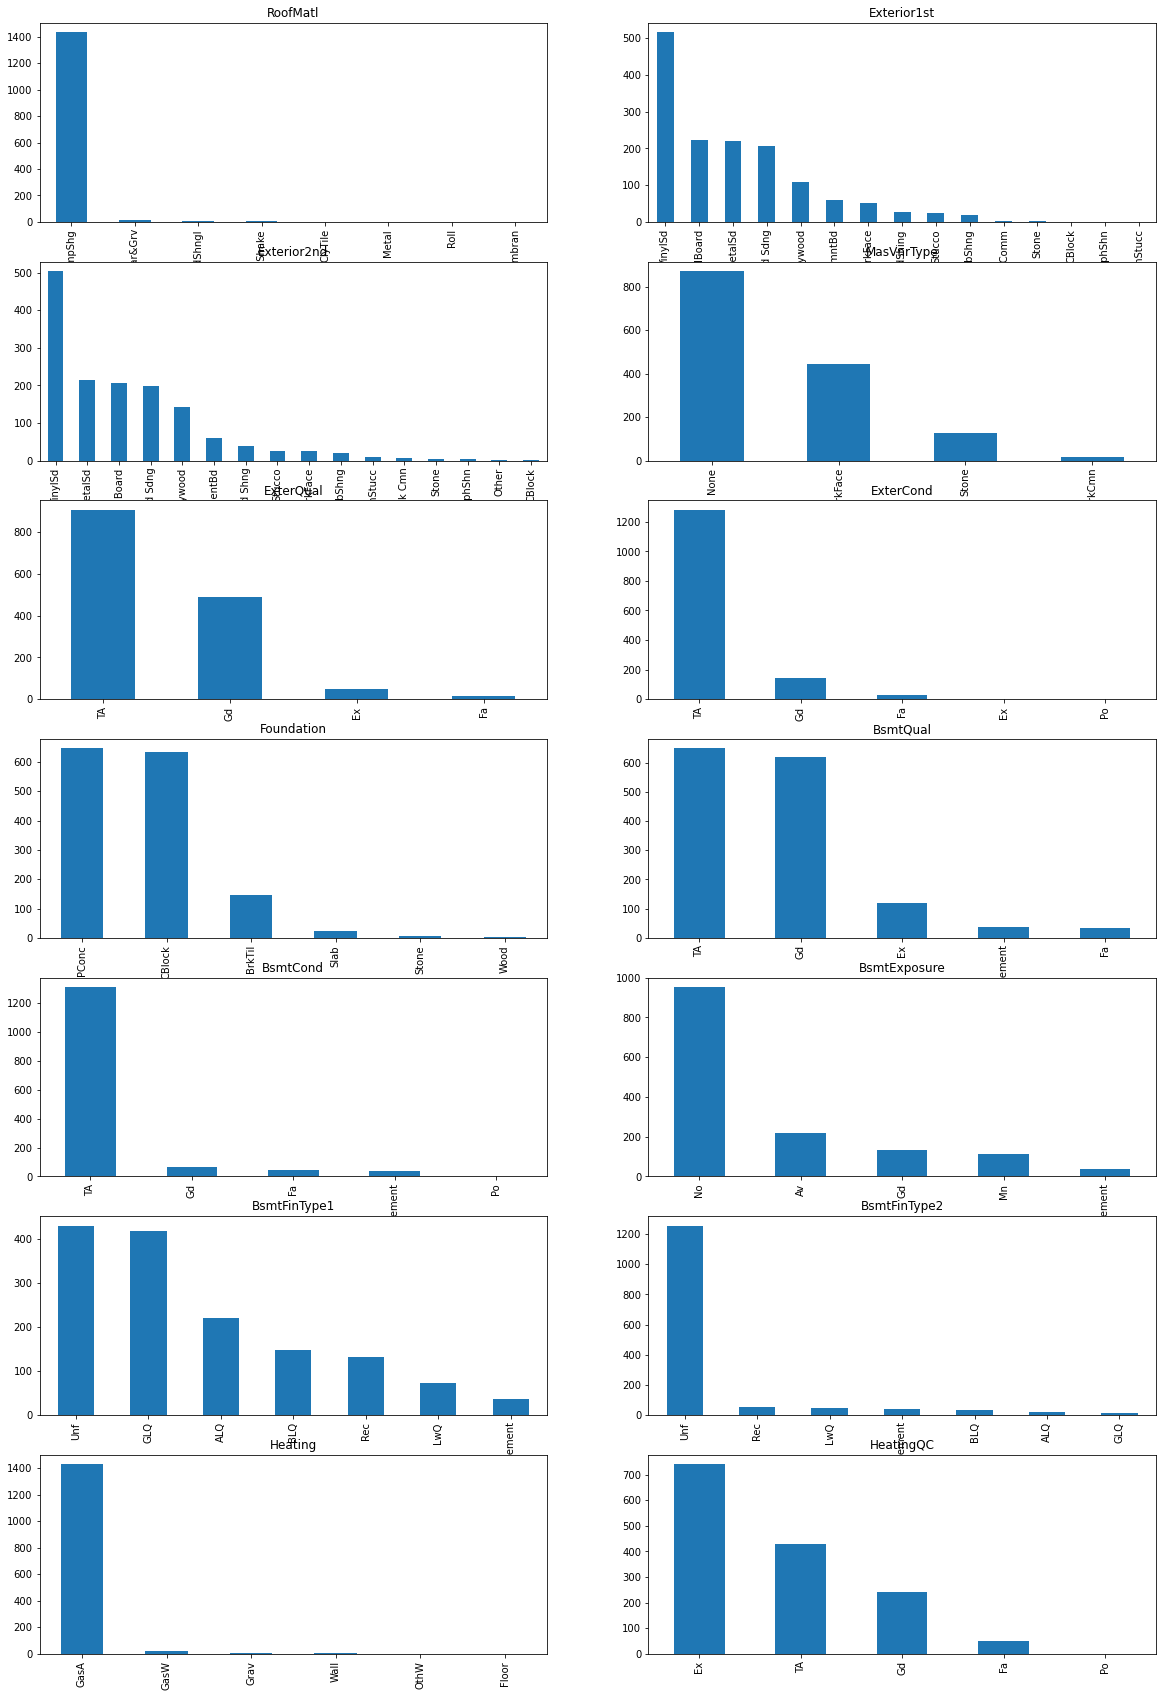

In [33]:
bar_plots((cat+num_cat)[14:28])

As seen from the plots, the following features seem to have imbalanced categories:
1. RoofMatl
2. Heating

<b>Observation: </b>The bar plots (distribution amongst categories) of Exterior1st and Exterior2nd seem to be almost the same, indicating the two variables are correlated. 

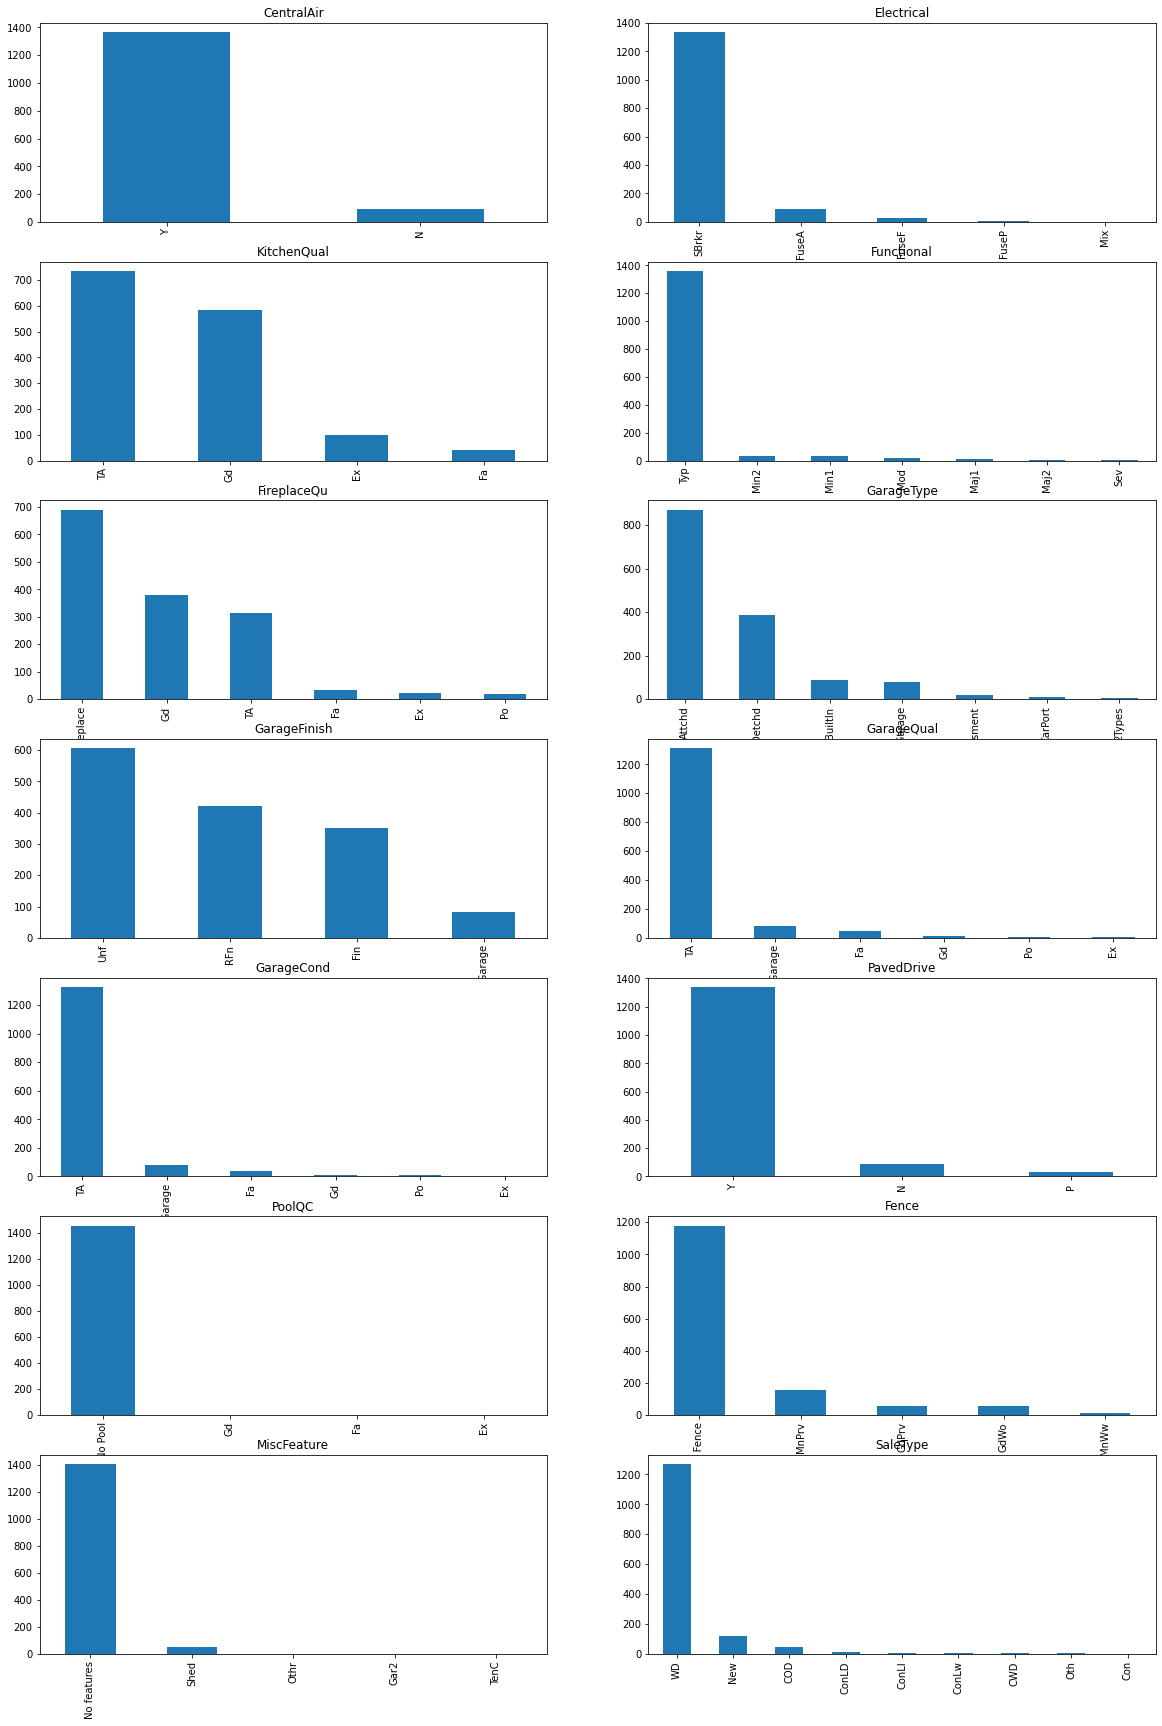

In [34]:
bar_plots((cat+num_cat)[28:42])

As seen from the plots, the following features seem to have imbalanced categories:
1. Central Air
2. Electrical
3. Functional
4. PoolQC
5. MiscFeature
6. SaleType

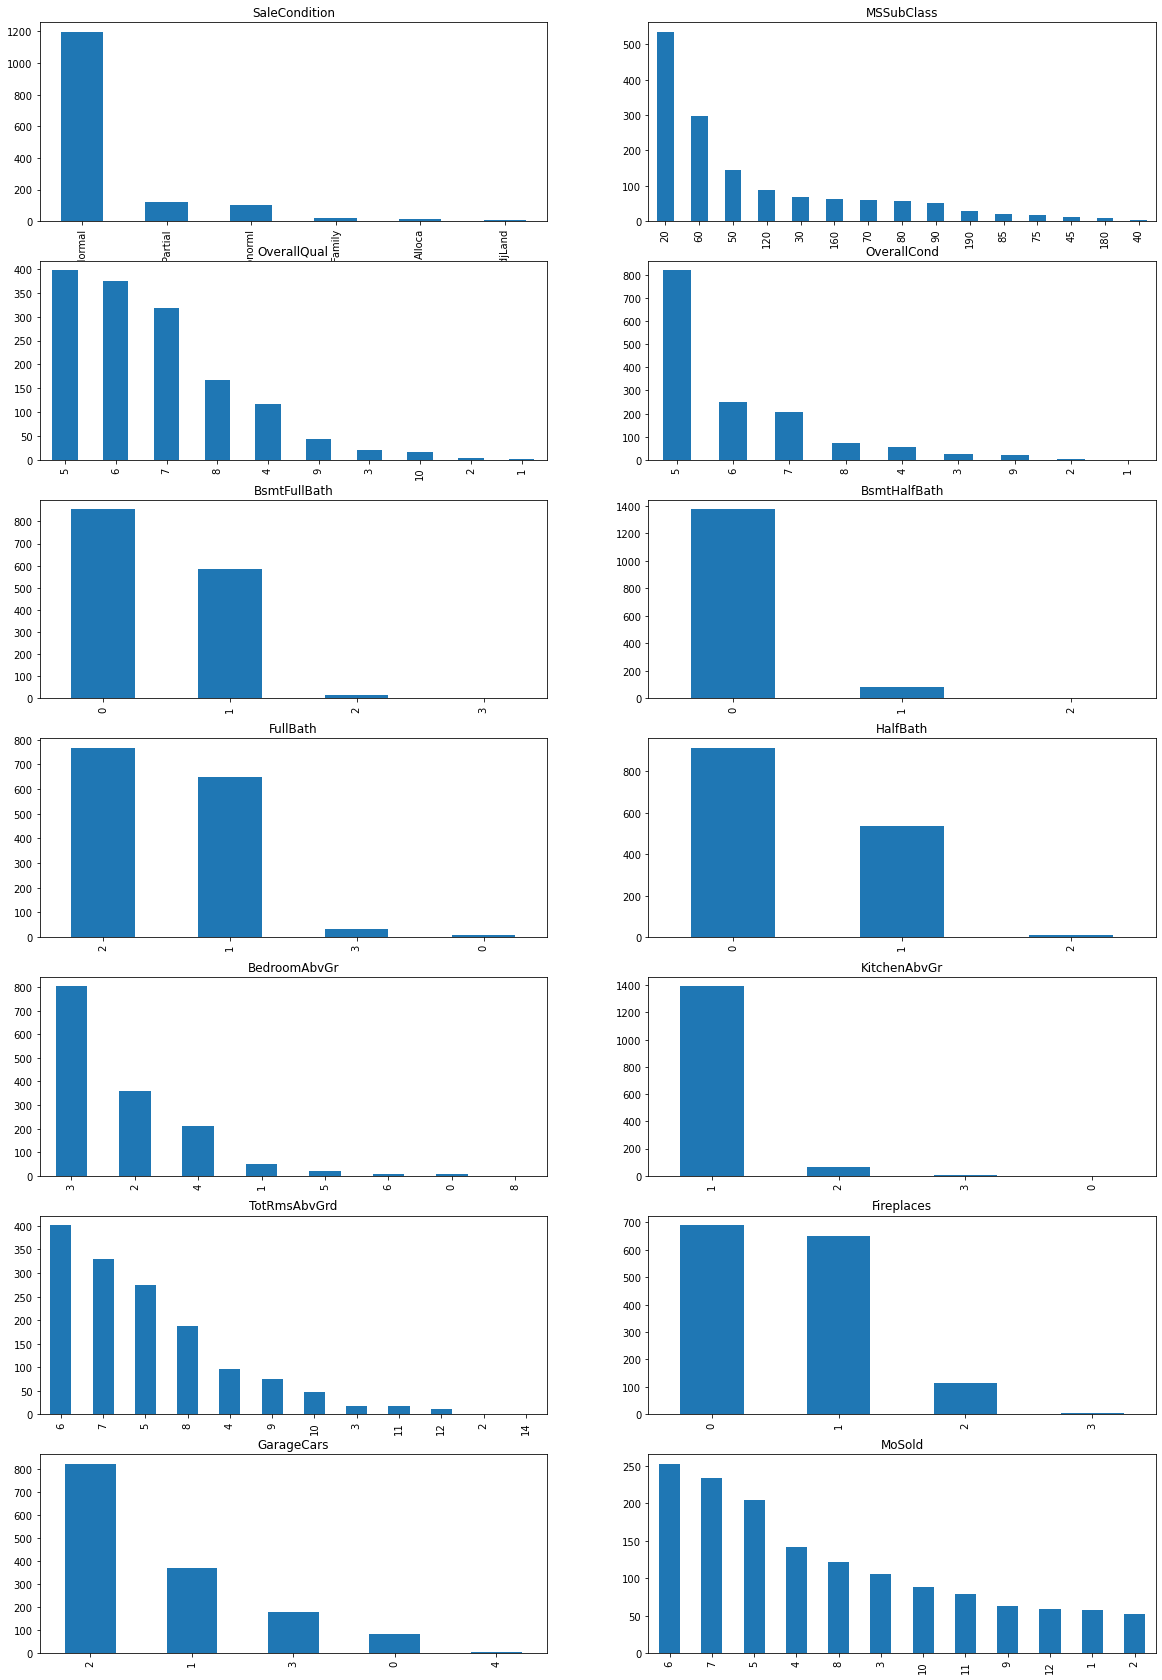

In [35]:
bar_plots((cat+num_cat)[42:])

As seen from the plots, the following features seem to have imbalanced categories:
1. SaleCondition
2. BsmtHalfBath
3. KitchenAbvGr

In [36]:
# Drop variables whose categories are imbalanced as these do not give enough information about the feature to properly determine whether it influences SalePrice
c=[i for i in cat if (pd.value_counts(df[i])/len(df)>0.8).any()]
n=[i for i in num_cat if (pd.value_counts(df[i])/len(df)>0.8).any()]

In [37]:
print(c)
print('\n')
print('No. of variables being dropped: '+str(len(c)))

['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


No. of variables being dropped: 24


In [38]:
df=df.drop(c,axis=1)
[cat.remove(i) for i in c]
df=df.drop(n,axis=1)
[num_cat.remove(i) for i in n]

[None, None]

### Bivariate Analysis

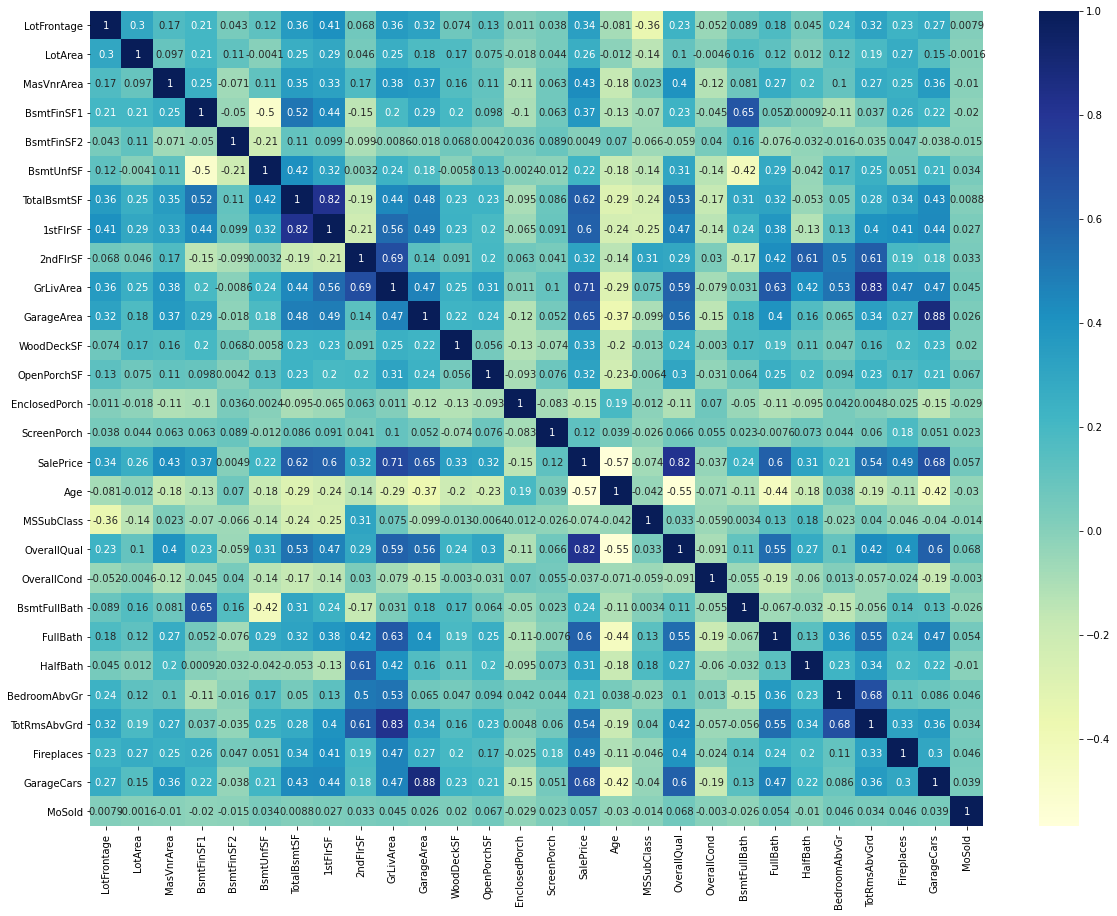

In [39]:
plt.figure(figsize = (20,15))
sns.heatmap(df[num+num_cat].corr(), annot = True, cmap="YlGnBu")
plt.show()

- GrLivArea, 1stFlrSF and 2ndFlrSF seem to have high correlation and thus a new variable can be derived from them. Based on business knowledge, it seems that GrLivArea=1stFlrSF+2ndFlrSF. 

In [40]:
print('Percentage of data for which GrLivArea is not the sum of 1stFlrSF and 2ndFlrSF: '+str(round((df['GrLivArea']!=df['1stFlrSF']+df['2ndFlrSF']).sum()/len(df),2)*100)+'%')

Percentage of data for which GrLivArea is not the sum of 1stFlrSF and 2ndFlrSF: 2.0%


In [41]:
#Defining new feature Floor:
df['Floor'] = df['1stFlrSF']+df['2ndFlrSF']

#Checking correlation:
df[['GrLivArea','Floor','SalePrice']].corr()

,GrLivArea,Floor,SalePrice
GrLivArea,1.000000,0.995609,0.708729
Floor,0.995609,1.000000,0.718371
SalePrice,0.708729,0.718371,1.000000


In [42]:
#Dropping 'GrLivArea','1stFlrSF','2ndFlrSF' as Floor will be used instead:
df=df.drop(['GrLivArea','1stFlrSF','2ndFlrSF'],axis=1)
[num.remove(i) for i in ['GrLivArea','1stFlrSF','2ndFlrSF']]

[None, None, None]

In [43]:
num.append('Floor')

- The high_corr function has been defined to get the features that are highly correlated with another. The function takes in the value of correlation and data and outputs a dictionary with features as keys and the corresponding highly correlated features as values. 
- The same is used as input for a heatmap as well.
- A correlation value of 0.5 has been chosen.

In [44]:
def high_corr(cor_value,data):
    dnc = data.corr()
    dnc1 = dnc[(abs(dnc)>cor_value)&(abs(dnc)!=1)]
    d = dict([(i,list(dnc1[dnc1[i].notnull()].index)) for i in dnc1.columns])
    d1 = d.copy()
    return dict([(key,d1[key]) for key in d.keys() if len(d[key])!=0])

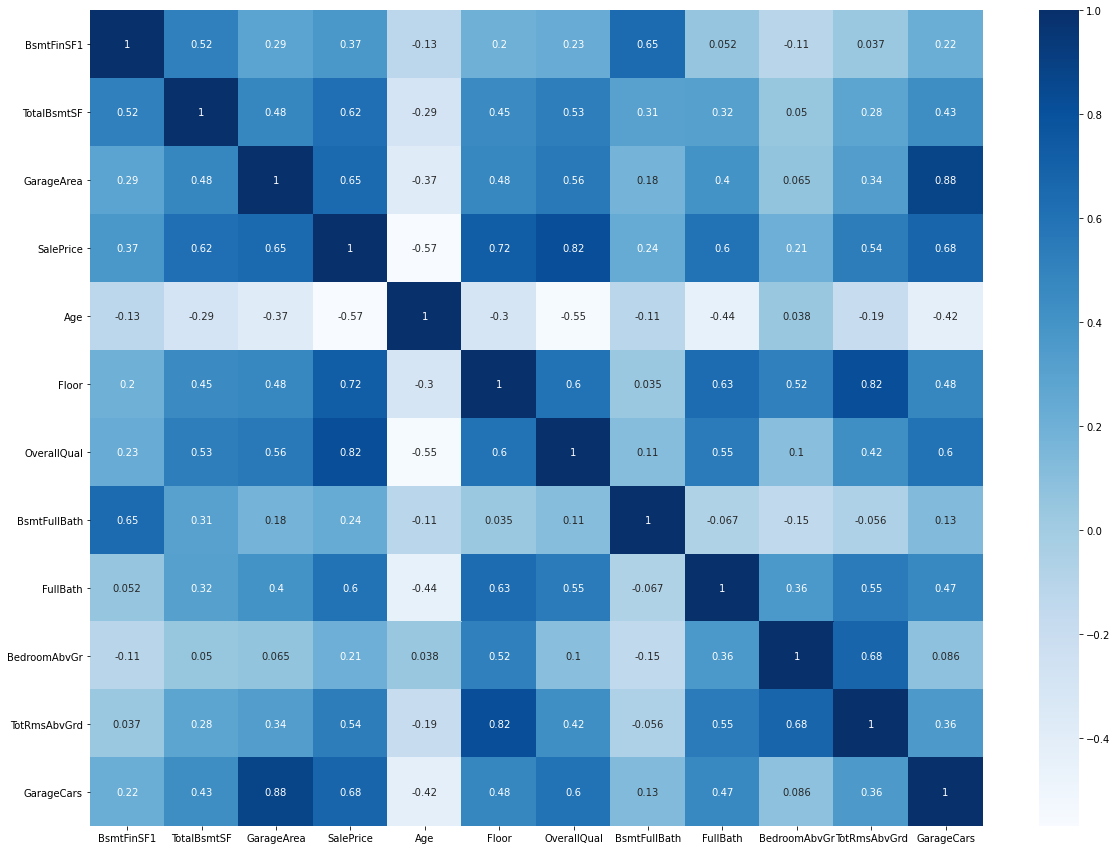

In [45]:
plt.figure(figsize = (20,15))
sns.heatmap(df[high_corr(0.5,df[num+num_cat]).keys()].corr(), annot = True, cmap='Blues')
plt.show()

In [46]:
#Variables highly correlated with SalePrice
df[high_corr(0.5,df[num+num_cat])['SalePrice']].corr()

,TotalBsmtSF,GarageArea,Age,Floor,OverallQual,FullBath,TotRmsAbvGrd,GarageCars
TotalBsmtSF,1.000000,0.484776,-0.290706,0.451172,0.534219,0.318452,0.279491,0.432972
GarageArea,0.484776,1.000000,-0.372561,0.477865,0.560543,0.403673,0.335487,0.882242
Age,-0.290706,-0.372561,1.000000,-0.296940,-0.552088,-0.439567,-0.192401,-0.422513
Floor,0.451172,0.477865,-0.296940,1.000000,0.598240,0.633977,0.821175,0.479610
OverallQual,0.534219,0.560543,-0.552088,0.598240,1.000000,0.548333,0.424382,0.599676
FullBath,0.318452,0.403673,-0.439567,0.633977,0.548333,1.000000,0.552585,0.468252
TotRmsAbvGrd,0.279491,0.335487,-0.192401,0.821175,0.424382,0.552585,1.000000,0.360445
GarageCars,0.432972,0.882242,-0.422513,0.479610,0.599676,0.468252,0.360445,1.000000


- Out of these, OverallQual, Floor, GarageCars are most correlated with SalePrice and therefore must be kept. 
- But, other variables that are correlated with these must be dropped to get reliable coefficients (avoid multicollinearity) after we fit a linear regression model to the data. <br> <br>
<b>Variables to be dropped:</b>
1. TotRmsAbvGrd is highly correlated with Floor and can therefore be removed.
2. GarageArea is highly correlated with GarageCars and OverallQual.
3. BsmtFinSF1 is highly correlated with BsmtFullBath and TotBsmtSF but low correlation with SalePrice.
<br> <br>
<b>Note: There will be other variables that may be correlated but these will be taken care of when doing hybrid (automated - RFE + manual) feature selection.</b>

In [47]:
df=df.drop(['TotRmsAbvGrd','GarageArea','BsmtFinSF1'],axis=1)

num_cat.remove('TotRmsAbvGrd')
[num.remove(i) for i in ['GarageArea','BsmtFinSF1']]

[None, None]

- Scatter plot of SalePrice (y) vs. variables with which SalePrice has correlation > 0.5

In [48]:
sp=high_corr(0.5,df[num])['SalePrice']

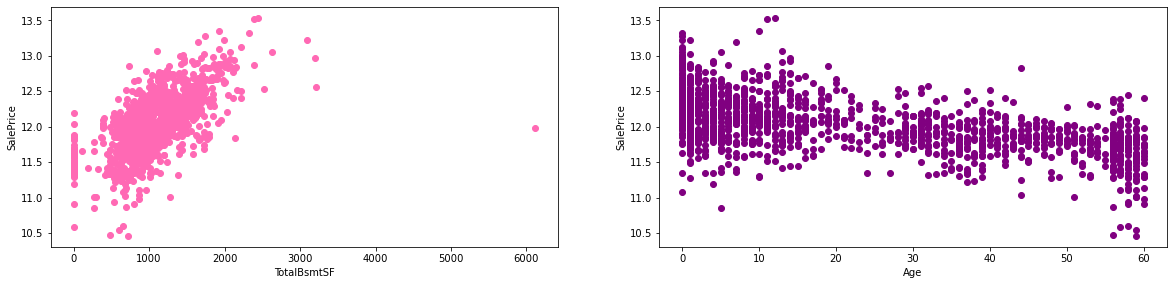

In [49]:
plt.figure(figsize=(20,15))
for (i,j) in zip(range(0,len(sp)),['hotpink','purple']):
    plt.subplot(3,2,i+1)
    plt.scatter(x = sp[i], y = 'SalePrice', data = df, color=j)
    plt.xlabel(sp[i])
    plt.ylabel('SalePrice')
plt.show()

In [50]:
spc=high_corr(0.5,df[num_cat+['SalePrice']])['SalePrice']

- The cat_plots function has been defined to plot the effect of each categorical variable on SalePrice. It takes the list of categorical variables to be plotted, data, figure size of the plot and subplot as input and gives boxplot of each category in the variable on the x-axis and SalePrice on y-axis as output.

In [51]:
def cat_plots(cat_cols,df=df,figs=(20,16),subp_x=4,subp_y=2):
    plt.figure(figsize=figs)
    for i in range(1,len(cat_cols)+1):
        plt.subplot(subp_x,subp_y,i)
        sns.boxplot(x = cat_cols[i-1], y = 'SalePrice', data = df)
    plt.show()

- Some variables have been plotted separately for interpretability (as they have many categories).

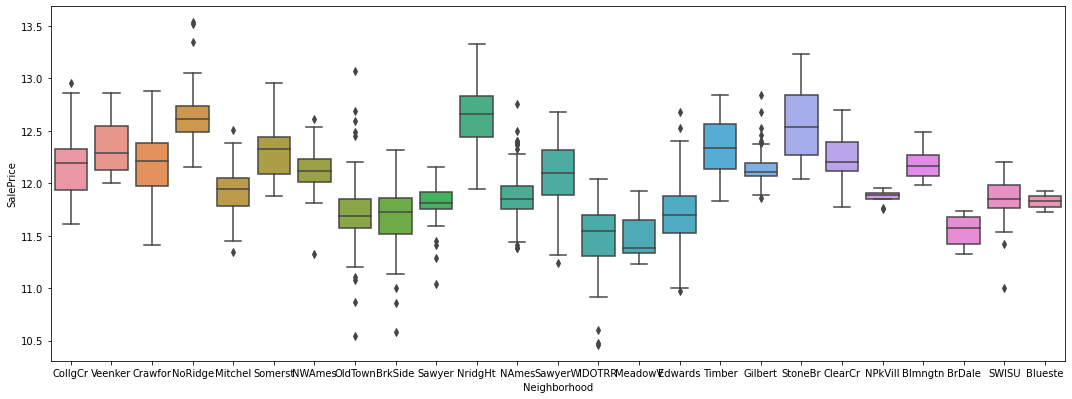

In [52]:
cat_plots(['Neighborhood'],figs=(40,30))

- The SalePrice is high for the categories: NoRidge, NridgHt, Timber and StoneBr.

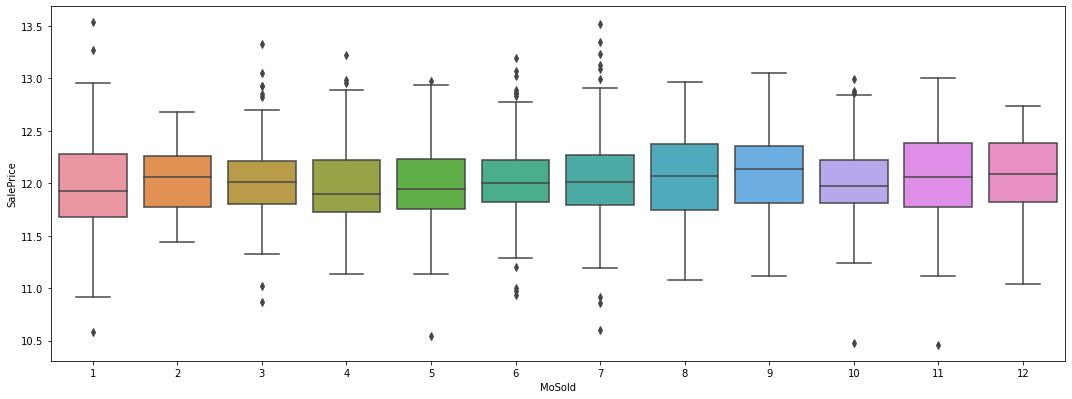

In [53]:
cat_plots(['MoSold'],figs=(40,30))

- The SalePrice is almost the same across all categorieso of MoSold and thus this variable can be dropped.

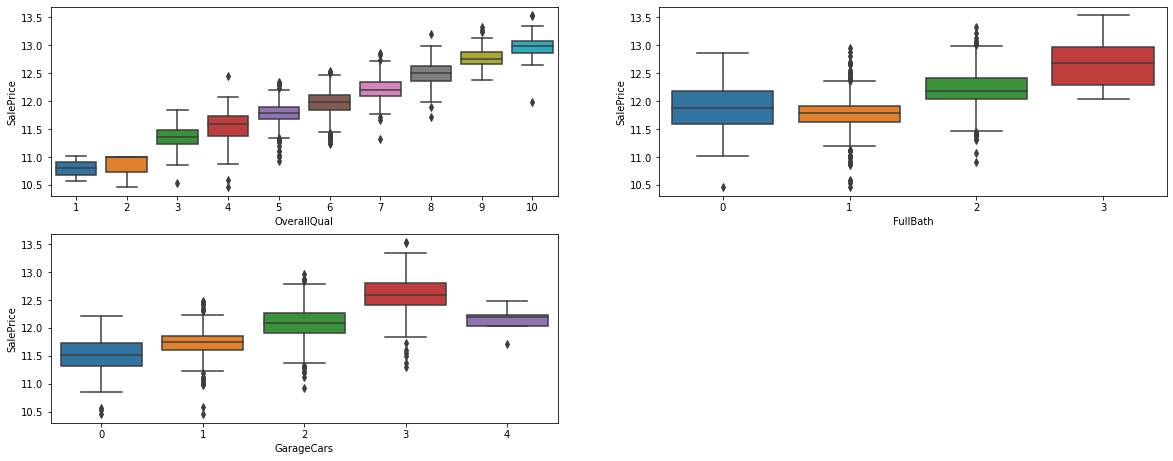

In [54]:
cat_plots(spc)

1. OverallQual and FullBath have a clear influence on SalePrice. As the OverallQual and FullBath values increase, so does the SalePrice.
2. GarageCars: Category 3 has higher SalePrice.

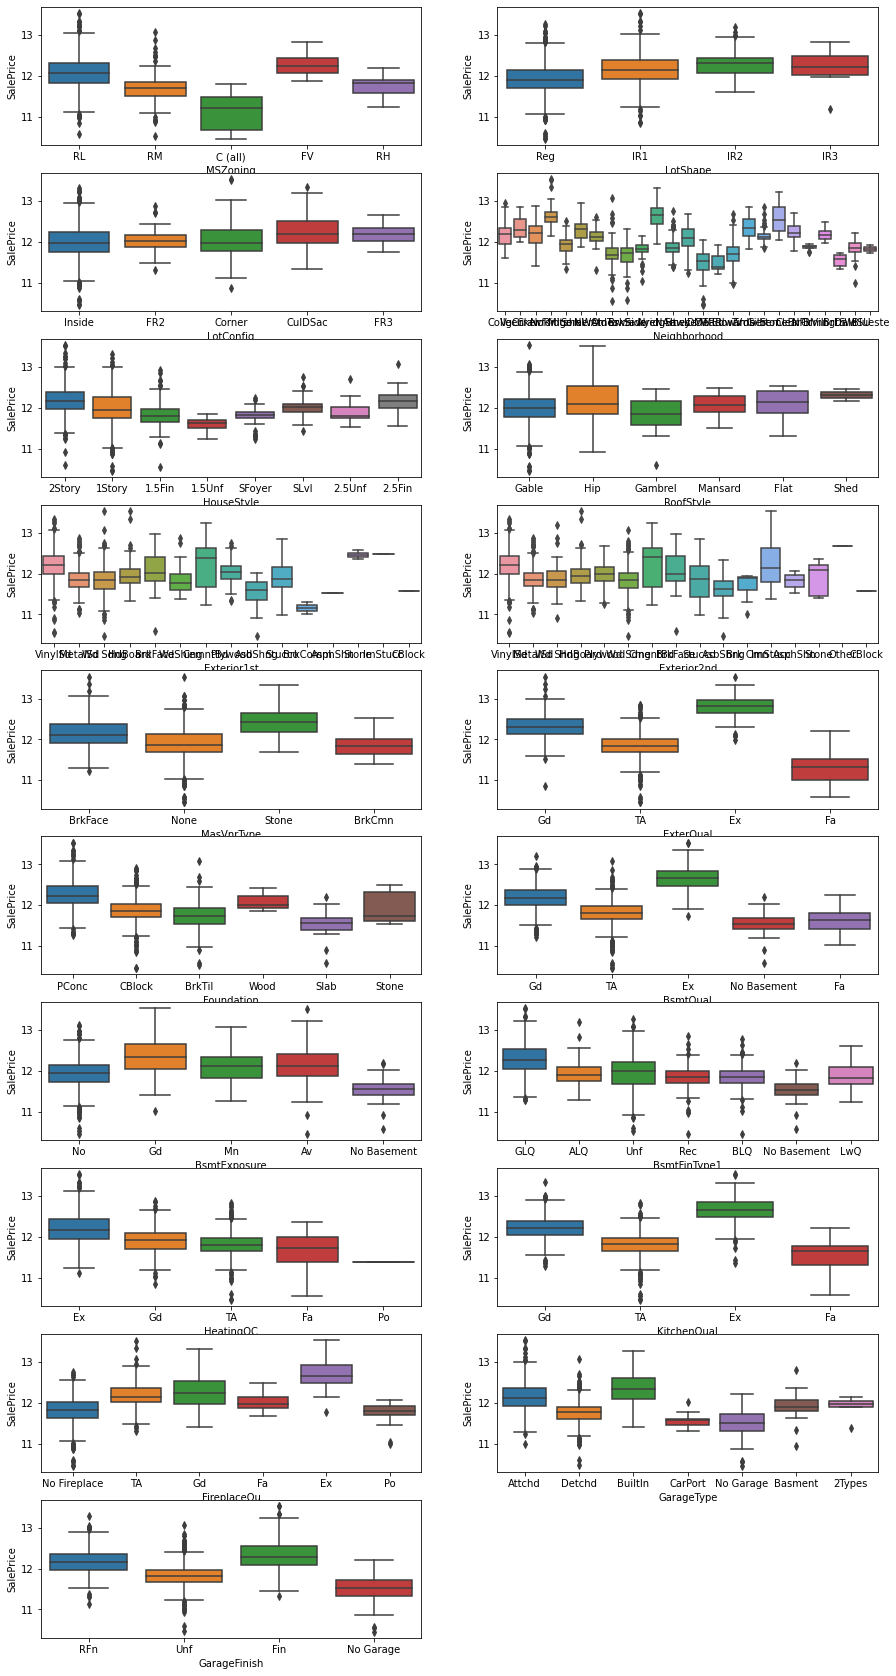

In [55]:
cat_plots(cat,figs=(15,30),subp_x=10,subp_y=2)

Interpretation of boxplot for each categorical variable w.r.t dependent variable (continuous type), cnt:
1. MSZoning: SalePrice is higher for type RL and FV.
2. The SalePrice does not vary much across the categories of LotShape, LotConfig, and RoofStyle indicating that they do not influence the target vaariable much.
3. Exterior1st and Exterior2nd seem to have a very similar effect on SalePrice indicating that they are highly correlated, thus one of these needs to be dropped. 
4. HouseStyle: 2Story, 1Story and 2.5Fin categories have higher SalePrice.
5. ExterQual, BsmtQual, KitchenQual, FireplaceQu, HeatingQC: For all the Quality type features, the category Ex (Excellent) has higher SalePrice.
6. MasVnrType: Stone has higher SalePrice. 
7. Foundation: PConc category seems to have higher SalePrice but overall, it is quite low for all categories.
8. BsmtExposure: Gd has higher SalePrice.
9. GarageType: Attchd and BuiltIn categories seem to have higher SalePrice but overall, it is quite low for all categories.
10. GarageFinish: RFn and Fin categories seem to have higher SalePrice but overall, it is quite low for all categories.
<br> <br>
<b>Summary - Categorical variables that seem affect SalePrice:</b> <br>
- OverallQual
- FullBath
- GarageCars
- Neighborhood
- Exterior1st and Exterior2nd (mentioned together as they seem to be correlated)
- ExterQual
- BsmtQual
- HeatingQc
- KitchenQual
- FireplaceQu

In [56]:
#Checking correlation between Exterior1st and Exterior2nd
e12=df[['SalePrice']]
e12['E1']=df['Exterior1st'].map({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,
'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,
'Stone':13, 'ImStucc':14, 'CBlock':15})

e12['E2']=df['Exterior2nd'].map({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,
'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,
'Stone':13, 'ImStucc':14, 'CBlock':15})

e12.corr()

,SalePrice,E1,E2
SalePrice,1.000000,-0.147378,-0.181459
E1,-0.147378,1.000000,0.864343
E2,-0.181459,0.864343,1.000000


- The variables are highly correlated and therefore E1 can be dropped. E2 is slightly more correlated with SalePrice and is kept.

In [57]:
df=df.drop(['LotShape','LotConfig', 'RoofStyle','Exterior1st'],axis=1)
[cat.remove(i) for i in ['LotShape','LotConfig', 'RoofStyle','Exterior1st']]

[None, None, None, None]

<b>Removing Outliers</b>

In [58]:
des = df[num].describe([0.25,0.50,0.75,0.95,0.98,0.99])

In [59]:
#Values which are higher than the 99th percentile are removed
len_d = len(df)
for i in num:
    df = df.drop(df[df[i]>des.loc['99%',i]].index,axis=0)

In [60]:
print(str(round((len(df)/len_d)*100,2))+'% of the data has been retained')

90.54% of the data has been retained


### Multivariate Analysis

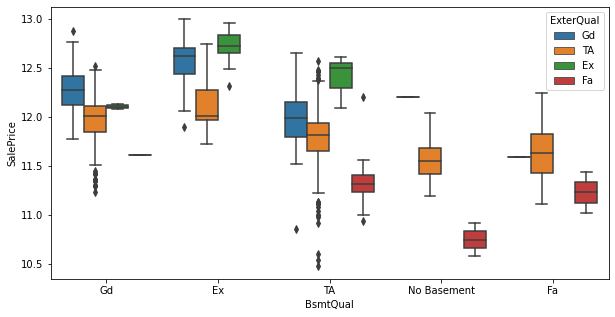

In [61]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', hue = 'ExterQual', data = df)
plt.show()

- Category Ex of BsmtQual and ExterQual have highest SalePrice.

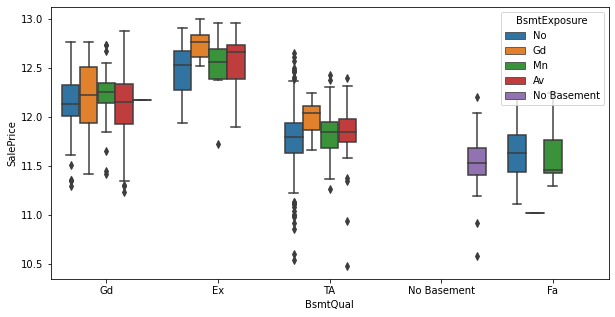

In [62]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', hue = 'BsmtExposure', data = df)
plt.show()

- Category Ex of BsmtQual and Gd of BsmtExposure have highest SalePrice.

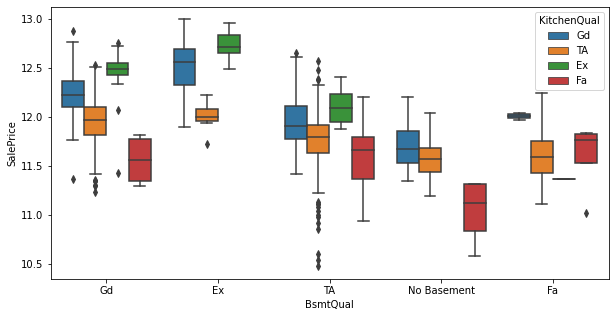

In [63]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', hue = 'KitchenQual', data = df)
plt.show()

- Category Ex of BsmtQual and KitchenQual have highest SalePrice.

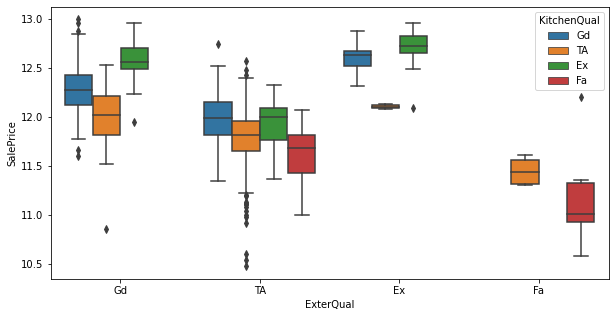

In [64]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'ExterQual', y = 'SalePrice', hue = 'KitchenQual', data = df)
plt.show()

- Category Ex of ExterQual and KitchenQual have highest SalePrice.

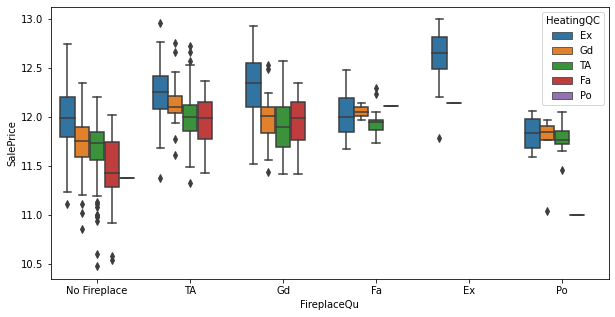

In [65]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', hue = 'HeatingQC', data = df)
plt.show()

- Category Ex of HeatingQC and FireplaceQu have highest SalePrice.

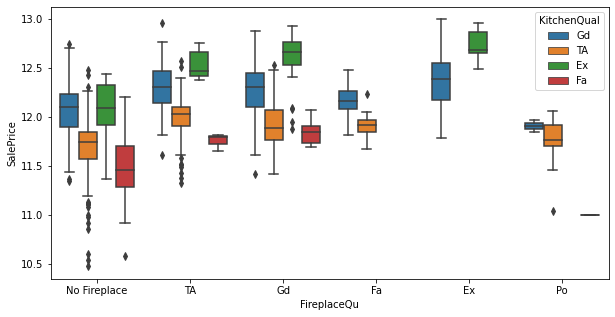

In [66]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', hue = 'KitchenQual', data = df)
plt.show()

- Categories Gd and Ex of FireplaceQu and Ex of KitchenQual have highest SalePrice.

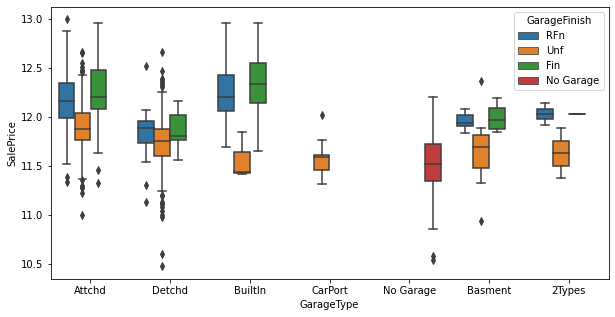

In [67]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'GarageType', y = 'SalePrice', hue = 'GarageFinish', data = df)
plt.show()

- Attchd and BuiltIn categories of GarageType and Fin category of GarageFinish have highest SalePrice but overall they do not seem to have much of an effect on SalePrice.

## Data Preparation

- Splitting categorical variables into ordinal and nominal to assign numerical values to categories of ordical features and convert nominal variable to dummy variables

In [68]:
ordn = ['ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu','BsmtExposure','BsmtFinType1']
nom = ['MSZoning', 'Neighborhood', 'HouseStyle','Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']

In [69]:
#Checking all variables have been included
assert len(pd.Series(ordn)[~pd.Series(ordn).isin(df.columns)])+len(pd.Series(nom)[~pd.Series(nom).isin(df.columns)])==0

- The map_qual function has been defined to map numerical values ranging from -1 to 4 for quality type variables with categories Ex, Gd, TA, Fa, Po, No Basement/Fireplace. It takes list of quality variables and data as input and outputs the converted data.

In [70]:
def map_qual(map_list,df=df):
    df[map_list]=df[map_list].apply(lambda x: x.map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':-1,'No Basement':0,'No Fireplace':0}))
    return df

In [71]:
df = map_qual(['ExterQual','BsmtQual','HeatingQC','KitchenQual','FireplaceQu'])

In [72]:
#Assigning numerical values to categories
df['BsmtExposure']=df['BsmtExposure'].map({'No':-1, 'Gd':3, 'Mn':1, 'Av':2, 'No Basement':0})
df['BsmtFinType1']=df['BsmtFinType1'].map({'GLQ':5, 'ALQ':4, 'Unf':-1, 'Rec':2, 'BLQ':3, 'No Basement':0, 'LwQ':1})

- As some variables have categories with the same name, the feature is being added as suffix

In [73]:
for i in nom:
    df[i] = df[i].astype(str)+'_'+str(i)

- The dummy function has been defined to create a dataframe with the dummy variables given a list of categorical variables.

In [74]:
def dummy(col_list,df=df):
    for i in col_list:
        df = pd.concat([df, pd.get_dummies(df[i], drop_first = True)], axis = 1)
    df=df.drop(col_list,axis=1)
    return df

In [75]:
df=dummy(nom)

### Train-test split

In [76]:
#Setting seed = 0 to makes sure the same random set of rows are chosen each time 
np.random.seed(0)

#Splitting data into train and test (80-20 split is being done)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2)

In [77]:
print(df_train.shape)
print(df_test.shape)

(1056, 97)
(265, 97)


#### Scaling:

- The StandardScaler is chosen. 

In [78]:
scaler=StandardScaler()

df_train[num] = scaler.fit_transform(df_train[num])

In [79]:
hc=high_corr(0.5,df_train)

In [80]:
# Dividing into X and Y sets for model building
y_train = df_train.pop('SalePrice')
X_train = df_train

In [81]:
#Fitting the model on the training data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Feature Selection

- Automatic feature selection is done using RFE

In [82]:
rfe = RFE(LinearRegression(), 3*(len(X_train.columns)//4)) #Considering 75% of the predictors
rfe = rfe.fit(X_train, y_train)

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
X_train_rfe = X_train[col]

In [85]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [87]:
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:47:08   Log-Likelihood:                -217.93
No. Observations:                1056   AIC:                             579.9
Df Residuals:                     984   BIC:                             937.2
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4

- The training R^2 and adjusted R^2 are 91% and 90% implying that 90% of the variations in SalePrice is being explained by the model.
- The F-statistic is quite high and the p-value of the F-stat is 0<0.05 indicating the model fit is not random.
- There are some variables that have p-value>0.05 and are therefore insignificant. These will be dealt with later.

<b>Manual Feature Selection</b>

In [88]:
#Features with p-value>0.05
hp=pd.Series(lm_rfe.pvalues[lm_rfe.pvalues>0.05].index)

- hp (High p-value) and hv (High VIF) are defined to check which variables have both high p-value and high vif so that they can dropped manually

In [89]:
#Checking for multicollinearity
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

#hv is the list of features with VIF>5
hv=vif.loc[vif['VIF']>=5,'Features']
vif

,Features,VIF
71,No Garage_GarageFinish,inf
70,No Garage_GarageType,inf
0,const,839.35
65,Attchd_GarageType,62.09
69,Detchd_GarageType,50.92
...,...,...
24,ClearCr_Neighborhood,1.17
63,Stone_Foundation,1.17
46,CBlock_Exterior2nd,1.14
22,Blueste_Neighborhood,1.12


In [90]:
#Dropping No Gar_Finish_GarageFinish
X2_train = X_train_rfe.drop('No Garage_GarageFinish',axis=1)
vif = pd.DataFrame()
X = X2_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
hv=vif.loc[vif['VIF']>=5,'Features']
vif[vif['VIF']>=5]

,Features,VIF
0,const,839.35
65,Attchd_GarageType,62.09
69,Detchd_GarageType,50.92
20,RL_MSZoning,38.48
58,None_MasVnrType,32.11
57,BrkFace_MasVnrType,29.25
21,RM_MSZoning,26.59
54,VinylSd_Exterior2nd,21.17
70,No Garage_GarageType,17.13
67,BuiltIn_GarageType,15.25


- Each time a variable is dropped, the common features between hv and hp are checked to further drop 

In [91]:
hv[hv.isin(hp)]

69       Detchd_GarageType
58         None_MasVnrType
57      BrkFace_MasVnrType
70    No Garage_GarageType
48     HdBoard_Exterior2nd
59        Stone_MasVnrType
55     Wd Sdng_Exterior2nd
51     Plywood_Exterior2nd
Name: Features, dtype: object

In [92]:
X3_train = X2_train.drop('Detchd_GarageType',axis=1)
vif = pd.DataFrame()
X = X3_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
hv=vif.loc[vif['VIF']>=5,'Features']
vif[vif['VIF']>=5]

,Features,VIF
0,const,597.63
20,RL_MSZoning,38.43
58,None_MasVnrType,32.11
57,BrkFace_MasVnrType,29.25
21,RM_MSZoning,26.52
54,VinylSd_Exterior2nd,21.17
48,HdBoard_Exterior2nd,12.58
50,MetalSd_Exterior2nd,11.76
59,Stone_MasVnrType,10.93
18,FV_MSZoning,10.74


In [93]:
hv[hv.isin(hp)]

58        None_MasVnrType
57     BrkFace_MasVnrType
48    HdBoard_Exterior2nd
59       Stone_MasVnrType
55    Wd Sdng_Exterior2nd
51    Plywood_Exterior2nd
Name: Features, dtype: object

In [94]:
X4_train = X3_train.drop('None_MasVnrType',axis=1)
vif = pd.DataFrame()
X = X4_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
hv=vif.loc[vif['VIF']>=5,'Features']
vif[vif['VIF']>=5]

,Features,VIF
0,const,480.58
20,RL_MSZoning,38.41
21,RM_MSZoning,26.52
54,VinylSd_Exterior2nd,21.17
48,HdBoard_Exterior2nd,12.58
50,MetalSd_Exterior2nd,11.76
18,FV_MSZoning,10.74
55,Wd Sdng_Exterior2nd,10.06
51,Plywood_Exterior2nd,9.10
60,PConc_Foundation,6.24


In [95]:
hv[hv.isin(hp)]

48    HdBoard_Exterior2nd
55    Wd Sdng_Exterior2nd
51    Plywood_Exterior2nd
Name: Features, dtype: object

In [96]:
X5_train = X4_train.drop('HdBoard_Exterior2nd',axis=1)
vif = pd.DataFrame()
X = X5_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
hv=vif.loc[vif['VIF']>=5,'Features']
vif[vif['VIF']>=5]

,Features,VIF
0,const,394.59
20,RL_MSZoning,38.23
21,RM_MSZoning,26.33
18,FV_MSZoning,10.68
59,PConc_Foundation,6.24
58,CBlock_Foundation,5.22


In [97]:
hv[hv.isin(hp)]

Series([], Name: Features, dtype: object)

In [98]:
#Fitting linear regression model to train data after performing feature selection
lm2 = sm.OLS(y_train,X5_train).fit()

In [99]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     148.3
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:47:10   Log-Likelihood:                -222.08
No. Observations:                1056   AIC:                             582.2
Df Residuals:                     987   BIC:                             924.5
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.5700 

### Residual Analysis

- Calculating train error for residual analysis

In [100]:
y_train_pred = lm2.predict(X5_train)

<b>Check1 - Linear Relationship: </b>There is a linear relationship between log(SalePrice) and X.

<b>Check2 - Normality:</b> Error terms are normally distributed around mean.

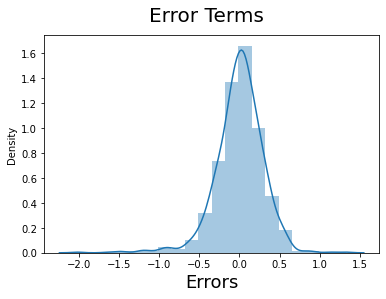

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)
plt.show()

- The error terms are normally distributed but there seems to be presence of some outliers. This can be treated via regularisation.

<b>Check3: Homoscedasticity</b>

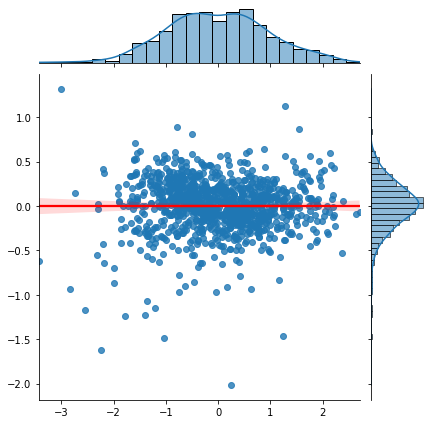

In [102]:
sns.jointplot(x=y_train_pred,y=y_train - y_train_pred,kind='reg',joint_kws={'line_kws':{'color':'r'}})
plt.show()

- The error terms do not seem to be homoscedastic. Regularisation is needed.

<b>Check4: Multicollinearity</b>

In [103]:
vif

,Features,VIF
0,const,394.59
20,RL_MSZoning,38.23
21,RM_MSZoning,26.33
18,FV_MSZoning,10.68
59,PConc_Foundation,6.24
...,...,...
66,CarPort_GarageType,1.11
62,Wood_Foundation,1.09
48,ImStucc_Exterior2nd,1.08
46,CBlock_Exterior2nd,1.08


- Multicollinearity exists. Regularisation is needed for this as well.

In [104]:
#Scaling test data with training data set's scaler 
df_test[num]=scaler.transform(df_test[num])

In [105]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [106]:
X_test = sm.add_constant(X_test)
X_test = X_test[X5_train.columns]
X_test

,const,LotFrontage,LotArea,OverallQual,OverallCond,BsmtQual,BsmtUnfSF,TotalBsmtSF,HeatingQC,BsmtFullBath,...,PConc_Foundation,Slab_Foundation,Stone_Foundation,Wood_Foundation,Attchd_GarageType,Basment_GarageType,BuiltIn_GarageType,CarPort_GarageType,No Garage_GarageType,Unf_GarageFinish
722,1.0,-0.429310,-0.326195,4,6,2,0.916189,-0.187604,4,0,...,1,0,0,0,0,0,0,0,0,1
445,1.0,0.274568,0.086618,6,5,2,2.100573,1.124152,1,0,...,0,0,0,0,1,0,0,0,0,1
1374,1.0,1.140880,0.365261,8,5,3,2.423587,1.481904,4,0,...,1,0,0,0,1,0,0,0,0,0
218,1.0,0.057990,1.510492,7,9,2,-0.241875,-0.566555,4,0,...,0,0,0,0,1,0,0,0,0,1
1314,1.0,0.924302,0.385865,6,5,1,-0.914223,-0.158454,2,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,-0.050299,-0.956084,5,6,2,-0.387830,-0.391655,2,1,...,0,0,0,0,0,0,0,0,1,0
259,1.0,0.112134,0.784942,5,5,0,-1.335337,-2.681265,3,0,...,1,0,0,0,0,0,0,0,0,1
1275,1.0,0.057990,0.842339,6,6,2,-1.024287,-0.765306,2,0,...,0,0,0,0,1,0,0,0,0,1
1337,1.0,1.465747,0.968415,7,5,3,-0.818515,-0.253854,4,1,...,1,0,0,0,0,0,1,0,0,0


In [107]:
#Predicting test based on linear model trained on train data
y_pred = lm2.predict(X_test)

In [108]:
print('Train: '+str(lm2.rsquared))
print('Test: '+str(r2_score(y_test, y_pred)))

Train: 0.9108360196313267
Test: 0.9058131376211547


In [109]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print('RSS: '+str(rss))
mse = mean_squared_error(y_test, y_pred)
print('MSE: '+str(mse))
#Root Mean Squared Error
rmse = mse**0.5
print('RMSE: '+str(rmse))

RSS: 22.65862692828486
MSE: 0.08550425255956551
RMSE: 0.29241110197727704


Although the R^2 values are high, the errors also seem to be a bit high.

## Regularisation

### Ridge

- Performing ridge regression to regularise the data.
- Grid search is being done to get optimal value of alpha

In [110]:
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X5_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [111]:
print(model_cv.best_params_['alpha'])

0.7


In [112]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X5_train, y_train)
print(ridge.coef_)

[ 0.          0.04095205  0.02968253  0.16351865  0.11353219  0.06487406
 -0.09988006  0.22297761  0.03846438  0.05904174  0.08597355  0.11742764
  0.0412126   0.03265943  0.12747669  0.02959071 -0.04442507  0.25031931
  0.8235932   0.64993849  0.69789693  0.55715979 -0.20222047 -0.19669868
 -0.03651889  0.21792756 -0.17412604 -0.0661631  -0.19214062 -0.42625395
 -0.07493781 -0.11654498 -0.01469958 -0.13865627  0.13362769 -0.23232869
 -0.13049458 -0.11047921 -0.1410409   0.17561785 -0.21292744  0.05337714
  0.07748368  0.15539851 -0.22907641  0.05720365 -0.17349989  0.11069901
 -0.01470209  0.06523484  0.01320363 -0.21498761 -0.01900644  0.04191505
  0.01612672 -0.07009338 -0.00608748  0.0420637   0.12998813  0.23701191
  0.39341289  0.26624525  0.02015321  0.05338421  0.06433689  0.09158127
 -0.34981338 -0.18722478 -0.05531129]


In [113]:
y_pred_train = ridge.predict(X5_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
adj_r2_train = 1-((1-r2_train_lr)*(len(X5_train)-1)/(len(X5_train)-len(X5_train.columns)-1))
print('Train R-squared: '+str(adj_r2_train))

r2_test_lr = r2_score(y_test, y_pred_test)
adj_r2_test = 1-((1-r2_test_lr)*(len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
print('Test R-squared: '+str(adj_r2_test))

Train R-squared: 0.9037068298276624
Test R-squared: 0.8780582639745459


In [114]:
mse_r = mean_squared_error(y_test,y_pred_test)
mse_r

0.08176744799171187

### Lasso

- Performing lasso regression to regularise the data.
- Grid search is being done to get optimal value of alpha

In [115]:
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 10
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_l.fit(X5_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [116]:
print(model_cv_l.best_params_)

{'alpha': 0.0005}


In [117]:
alpha = model_cv_l.best_params_['alpha']
lasso = Lasso(alpha=alpha)

lasso.fit(X5_train, y_train)
print(lasso.coef_)

[ 0.          0.04319272  0.02956495  0.1692751   0.11356452  0.06449884
 -0.10147196  0.22209424  0.04243853  0.05646584  0.07705413  0.10479165
  0.0442883   0.03319612  0.13216487  0.02890802 -0.04703636  0.25121578
  0.81778455  0.60760613  0.67242912  0.5139727  -0.         -0.11296525
 -0.          0.21978678 -0.13045399 -0.03598084 -0.12877433 -0.30432709
 -0.02949064 -0.07378145 -0.         -0.09221432  0.12599672 -0.19599883
 -0.07939174 -0.07254654 -0.09267069  0.16513875 -0.12629367  0.01995746
  0.06627383  0.00497615 -0.1382098   0.01395124 -0.          0.08070582
 -0.          0.05513921  0.00278568 -0.06798684 -0.          0.03834496
  0.         -0.05156553 -0.          0.03890163  0.10247209  0.21963396
  0.34101993  0.05523941  0.          0.04731631  0.01720306  0.08149487
 -0.29524881 -0.17469247 -0.05791283]


In [118]:
y_pred_train_l = lasso.predict(X5_train)
y_pred_test_l = lasso.predict(X_test)

r2_train_lr_l = r2_score(y_train, y_pred_train_l)
adj_r2_train_l = 1-((1-r2_train_lr_l)*(len(X5_train)-1)/(len(X5_train)-len(X5_train.columns)-1))
print('Train R-squared: '+str(adj_r2_train_l))

r2_test_lr_l = r2_score(y_test, y_pred_test_l)
adj_r2_test_l = 1-((1-r2_test_lr_l)*(len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
print('Test R-squared: '+str(adj_r2_test_l))

Train R-squared: 0.9021957732122751
Test R-squared: 0.8804355653312999


In [119]:
mse_l = mean_squared_error(y_test,y_pred_test_l)
mse_l

0.08017335993470377

In [120]:
betas = pd.DataFrame()
betas['Feature'] = X5_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [121]:
final = betas[betas['Lasso']!=0].reset_index(drop=True)

In [122]:
X_train_l = X5_train[final['Feature']]

In [123]:
print(len(X5_train.columns)-1,len(X_train_l.columns))

68 59


- The test R^2 is slightly higher for lasso (88.04%) than ridge (87.8%).
- The mse is lower for lasso (0.080) than ridge (0.081).
- Lasso also does feature selection. 
- Thus, lasso model with alpha = 0.0005 will be chosen.

#### Top 5 features

In [124]:
lm = LinearRegression()

# Performing RFE to choose top 5 features of lasso model

rfe = RFE(lm, 5)            
rfe = rfe.fit(X_train_l, y_train)

In [125]:
col = X_train_l.columns[rfe.support_]

X_train_l=X_train_l[col]

In [126]:
X_train_l.columns

Index(['OverallQual', 'FV_MSZoning', 'RH_MSZoning', 'RL_MSZoning',
       'Brk Cmn_Exterior2nd'],
      dtype='object')

Therefore, the <b>Top 5 features</b> obtained using the <b>lasso</b> model with <b>alpha = 0.0005, train R^2 = 90.21%, test R^2 = 88.04% and mse = 0.08</b> are:
1. OverallQual
2. FV_MSZoning
3. RH_MSZoning
4. RL_MSZoning
5. Brk Cmn_Exterior2nd

# Part 2

#### Q1.

In [127]:
print('Optimal Alpha for Lasso: '+str(model_cv_l.best_params_['alpha']))
print('Optimal Alpha for Ridge: '+str(model_cv.best_params_['alpha']))

Optimal Alpha for Lasso: 0.0005
Optimal Alpha for Ridge: 0.7


In [128]:
alpha = model_cv.best_params_['alpha']*2
ridge = Ridge(alpha=alpha)

ridge.fit(X5_train, y_train)
print(ridge.coef_)

[ 0.          0.04184274  0.03018355  0.16744521  0.11456158  0.06146374
 -0.10029559  0.22312996  0.03929556  0.05877324  0.08949838  0.11743866
  0.04214963  0.03294293  0.1271153   0.02939326 -0.04442212  0.24817947
  0.6494439   0.45878805  0.52869855  0.39338916 -0.15413166 -0.18119998
 -0.02748964  0.2159045  -0.16258093 -0.06243445 -0.2162771  -0.38284747
 -0.06419386 -0.10498017 -0.01847486 -0.12919952  0.12951515 -0.23090872
 -0.11741281 -0.10057983 -0.12867395  0.17251    -0.21397738  0.04769058
  0.07693939  0.1277319  -0.19514071  0.04866605 -0.11809958  0.09982506
 -0.01472569  0.06492488  0.01324782 -0.17399126 -0.01556461  0.04336744
  0.01532913 -0.06571836 -0.00530036  0.04353646  0.12203817  0.23395514
  0.36697764  0.16879016  0.01561175  0.05432324  0.05217865  0.09165566
 -0.30846689 -0.1804305  -0.05339377]


In [129]:
y_pred_train = ridge.predict(X5_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
adj_r2_train_2 = 1-((1-r2_train_lr)*(len(X5_train)-1)/(len(X5_train)-len(X5_train.columns)-1))
print('Train R-squared: '+str(adj_r2_train_2))

r2_test_lr = r2_score(y_test, y_pred_test)
adj_r2_test_2 = 1-((1-r2_test_lr)*(len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
print('Test R-squared: '+str(adj_r2_test_2))

Train R-squared: 0.9026331591505729
Test R-squared: 0.8797835289456616


In [130]:
alpha = model_cv_l.best_params_['alpha']*2
lasso = Lasso(alpha=alpha)

lasso.fit(X5_train, y_train)
print(lasso.coef_)

[ 0.          0.04452302  0.03037237  0.17926486  0.11458031  0.06074114
 -0.10349056  0.22236263  0.04482556  0.05448247  0.07439461  0.09560023
  0.04796113  0.03367183  0.13739728  0.02850095 -0.04842265  0.24987318
  0.48683158  0.19970984  0.33942093  0.18294784 -0.         -0.02715515
  0.          0.22292561 -0.08906714 -0.00784432 -0.15417623 -0.16385736
 -0.         -0.0295278  -0.         -0.04704951  0.11055355 -0.17312106
 -0.01738388 -0.03031528 -0.04214541  0.14539565 -0.07363435  0.
  0.05371951  0.         -0.00749032  0.         -0.          0.03944853
 -0.          0.05238074  0.         -0.         -0.          0.03889953
  0.         -0.02255938 -0.          0.03430761  0.07785614  0.21189085
  0.28054655  0.          0.          0.04783019  0.          0.07177318
 -0.18947034 -0.14873972 -0.0572607 ]


In [131]:
y_pred_train_l = lasso.predict(X5_train)
y_pred_test_l = lasso.predict(X_test)

r2_train_lr_l = r2_score(y_train, y_pred_train_l)
adj_r2_train_l2 = 1-((1-r2_train_lr_l)*(len(X5_train)-1)/(len(X5_train)-len(X5_train.columns)-1))
print('Train R-squared: '+str(adj_r2_train_l2))

r2_test_lr_l = r2_score(y_test, y_pred_test_l)
adj_r2_test_l2 = 1-((1-r2_test_lr_l)*(len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
print('Test R-squared: '+str(adj_r2_test_l2))

Train R-squared: 0.8980008558053213
Test R-squared: 0.881341565675414


In [132]:
rsq=pd.DataFrame()
rsq['Metric'] = ['Ridge-Train R-squared: Opt Alpha','Ridge-Test R-squared: Opt Alpha','Lasso-Train R-squared: Opt Alpha','Lasso-Test R-squared: Opt Alpha','Ridge-Train R-squared: 2*Alpha','Ridge-Test R-squared: 2*Alpha','Lasso-Train R-squared: 2*Alpha','Lasso-Test R-squared: 2*Alpha']
rsq['Value'] = [adj_r2_train,adj_r2_test,adj_r2_train_l,adj_r2_test_l,adj_r2_train_2,adj_r2_test_2,adj_r2_train_l2,adj_r2_test_l2]
rsq

,Metric,Value
0,Ridge-Train R-squared: Opt Alpha,0.903707
1,Ridge-Test R-squared: Opt Alpha,0.878058
2,Lasso-Train R-squared: Opt Alpha,0.902196
3,Lasso-Test R-squared: Opt Alpha,0.880436
4,Ridge-Train R-squared: 2*Alpha,0.902633
5,Ridge-Test R-squared: 2*Alpha,0.879784
6,Lasso-Train R-squared: 2*Alpha,0.898001
7,Lasso-Test R-squared: 2*Alpha,0.881342


- Increasing alpha to 2\*alpha caused the training R2 to reduce, for both ridge and lasso regression, indicating that this model is slightly underfitting compared to the model trained using optimal alpha.

In [133]:
betas2 = pd.DataFrame()
betas2['Feature'] = X5_train.columns
betas2['Ridge'] = ridge.coef_
betas2['Lasso'] = lasso.coef_

In [134]:
final2 = betas2[betas2['Lasso']!=0].reset_index(drop=True)

In [135]:
X_train_l2 = X5_train[final2['Feature']]

In [136]:
lm = LinearRegression()
#lm.fit(X_train_l, y_train)

# running RFE

rfe = RFE(lm, 5)            
rfe = rfe.fit(X_train_l2, y_train)

In [137]:
col = X_train_l2.columns[rfe.support_]

X_train_l2=X_train_l2[col]
X_train_l2.columns

Index(['OverallQual', 'FV_MSZoning', 'RH_MSZoning', 'RL_MSZoning',
       'Brk Cmn_Exterior2nd'],
      dtype='object')

In [138]:
X_train_l.columns

Index(['OverallQual', 'FV_MSZoning', 'RH_MSZoning', 'RL_MSZoning',
       'Brk Cmn_Exterior2nd'],
      dtype='object')

In [139]:
X_train_l2.columns

Index(['OverallQual', 'FV_MSZoning', 'RH_MSZoning', 'RL_MSZoning',
       'Brk Cmn_Exterior2nd'],
      dtype='object')

Now, the five most important features are:
1. OverallQual
2. FV_MSZoning
3. RH_MSZoning
4. RL_MSZoning
5. Brk Cmn_Exterior2nd

There is no change.

### Q3.

In [140]:
X_train_3 = X5_train.drop(list(X_train_l.columns),axis=1)
X_test_3 = X_test[X_train_3.columns]

In [141]:
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 10
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_l.fit(X_train_3, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [142]:
print(model_cv_l.best_params_)

{'alpha': 0.0001}


In [143]:
alpha = model_cv_l.best_params_['alpha']
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_3, y_train)
print(lasso.coef_)

[ 0.          0.04527292  0.01344018  0.13269922  0.12724879 -0.09413401
  0.23315783  0.05119426  0.04346488  0.1241398   0.14494794  0.0960482
  0.0530667   0.13146411  0.02026425 -0.04803134  0.28933437 -0.04631921
 -0.3623802  -0.22325826 -0.08516302  0.19058276 -0.25605723 -0.10654793
 -0.47978557 -0.7742192  -0.09671241 -0.15882581 -0.11692429 -0.1596105
  0.17618795 -0.35457751 -0.19930127 -0.1231619  -0.20737155  0.28981445
 -0.36268696  0.1055331   0.13874543  0.22929134  0.03492121 -0.34696426
  0.15563353  0.          0.0749559   0.0071447  -0.21949936  0.02387258
  0.03441788  0.03982905 -0.03288638  0.00893141  0.08678695  0.12901846
  0.28443938  0.44117631  0.07142814  0.          0.0823631   0.00600482
  0.07575507 -0.39075957 -0.23585369 -0.07428282]


In [144]:
y_pred_train_l = lasso.predict(X_train_3)
y_pred_test_l = lasso.predict(X_test_3)

r2_train_lr_l = r2_score(y_train, y_pred_train_l)
adj_r2_train_l = 1-((1-r2_train_lr_l)*(len(X_train_3)-1)/(len(X_train_3)-len(X_train_3.columns)-1))
print('Train R-squared: '+str(adj_r2_train_l))

r2_test_lr_l = r2_score(y_test, y_pred_test_l)
adj_r2_test_l = 1-((1-r2_test_lr_l)*(len(X_test_3)-1)/(len(X_test_3)-len(X_test_3.columns)-1))
print('Test R-squared: '+str(adj_r2_test_l))

Train R-squared: 0.8842462841167784
Test R-squared: 0.8640597840525399


- The R-squared values have reduced as expected.

In [145]:
betas3 = pd.DataFrame()
betas3['Feature'] = X_train_3.columns
betas3['Lasso'] = lasso.coef_

In [146]:
final3 = betas3[betas3['Lasso']!=0].reset_index(drop=True)

In [147]:
X_train3 = X_train_3[final3['Feature']]

In [148]:
lm = LinearRegression()
#lm.fit(X_train_l, y_train)

# running RFE

rfe = RFE(lm, 5)            
rfe = rfe.fit(X_train3, y_train)

In [149]:
#Updated Five most important features
X_train3.columns[rfe.support_]

Index(['KitchenQual', 'BrDale_Neighborhood', 'IDOTRR_Neighborhood',
       'MeadowV_Neighborhood', 'OldTown_Neighborhood'],
      dtype='object')